In [1]:
import codecs
import os
from collections import defaultdict
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)

In [2]:
def run(file, csid, cusr, cans, sort_by):
    dirname = os.path.dirname("./")
    infname = os.path.join(dirname, f'raw_input/{file}.csv')
    with codecs.open(infname, 'r', 'utf-8', 'ignore') as f:
        df = pd.read_csv(f)
        print(df.columns)
    print(df['CustomerNumber'].value_counts())

In [3]:
run('Asteria_Eng_ver5', 'SkillID', 'CustomerNumber', 'AnswerResult', 'LearningDateTime')

Index(['Unnamed: 0', 'SEQ', 'CustomerNumber', 'LearningDateTime',
       'ResourceNumber', 'SkillID', 'AnswerResult'],
      dtype='object')
801490604W    7133
8014952070    7012
8015748647    5783
801574005U    5016
8015556655    4689
              ... 
801623059Y       1
801491160U       1
801579469D       1
8016234480       1
8015870294       1
Name: CustomerNumber, Length: 2553, dtype: int64


In [4]:
file = 'Asteria_Eng_ver5'

dirname = os.path.dirname("./")
infname = os.path.join(dirname, f'raw_input/{file}.csv')
with codecs.open(infname, 'r', 'utf-8', 'ignore') as f:
    df = pd.read_csv(f)
    print(df.columns)

Index(['Unnamed: 0', 'SEQ', 'CustomerNumber', 'LearningDateTime',
       'ResourceNumber', 'SkillID', 'AnswerResult'],
      dtype='object')


In [5]:
sid_list = sorted(list(set(df['SkillID'])))
sid_dict = {sid: idx for idx, sid in enumerate(sid_list)}

In [6]:
sid_list_L = [s for s in sid_list if s[:3] == 'NEL']
sid_list_R = [s for s in sid_list if s[:3] == 'NER']
sid_list_W = [s for s in sid_list if s[:3] == 'NEW']
sid_list_S = [s for s in sid_list if s[:3] == 'NES']

In [7]:
print(len(sid_list_L), len(sid_list_R), len(sid_list_W), len(sid_list_S))

50 47 163 66


In [8]:
file, csid, cusr, cans, sort_by = 'Asteria_Eng_ver5', 'SkillID', 'CustomerNumber', 'AnswerResult', 'LearningDateTime'
outfile_name='Asteria_Eng_ver5_sorted_scat'

dirname = os.path.dirname('./')
infname = os.path.join(dirname, f'raw_input/{file}.csv')

with codecs.open(infname, 'r', 'utf-8', 'ignore') as f:
    df = pd.read_csv(f)
    print(df.columns)

for skill_cat in {'NEL', 'NER', 'NES', 'NEW'}:
    outfname = os.path.join(dirname, f'input/{outfile_name if outfile_name else file}_{skill_cat}.pickle')
    outdicname = os.path.join(dirname, f'input/{outfile_name if outfile_name else file}_{skill_cat}_dic.pickle')
    # order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,answer_type,sequence_id,student_class_id,position,type,base_sequence_id,skill_id,skill_name,teacher_id,school_id,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
    print(infname)

    if sort_by:
        df = df.sort_values(by=sort_by)

    processed = defaultdict(list)

    sc_df = df[df['SkillID'].map(lambda x: x[:3]) == skill_cat]
    for idx, row in sc_df.iterrows():
        # nanは無視する
        sid = row[csid]
        usr = row[cusr]
        ans = row[cans]

        if pd.isnull(sid) or pd.isnull(ans) or pd.isnull(usr):
            continue
        # processed[row.user_id].append((problems[row.problem_id], row.correct))
        processed[usr].append((sid_dict[sid], ans))

    print('Skill Category:', skill_cat)
    print('Skills:', len(problems))
    print('Students:', len(processed))
    print('=====================')

    # Save processed data
    with open(outfname, 'wb') as f:
        pickle.dump(dict(processed), f)
#     with open(outdicname, 'wb') as f:
#         pickle.dump(dict(problems), f)

Index(['Unnamed: 0', 'SEQ', 'CustomerNumber', 'LearningDateTime',
       'ResourceNumber', 'SkillID', 'AnswerResult'],
      dtype='object')
./raw_input/Asteria_Eng_ver5.csv
Skill Category: NES


NameError: name 'problems' is not defined

In [ ]:
def id_generator():
    n = 0
    while True:
        yield n
        n += 1


file, csid, cusr, cans, sort_by = 'Asteria_Eng_ver5', 'SkillID', 'CustomerNumber', 'AnswerResult', 'LearningDateTime'
outfile_name='Asteria_Eng_ver5_sorted'

dirname = os.path.dirname('./')
infname = os.path.join(dirname, f'raw_input/{file}.csv')

with codecs.open(infname, 'r', 'utf-8', 'ignore') as f:
    df = pd.read_csv(f)
    print(df.columns)

outfname = os.path.join(dirname, f'input/{outfile_name if outfile_name else file}.pickle')
outdicname = os.path.join(dirname, f'input/{outfile_name if outfile_name else file}_dic.pickle')
# order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,answer_type,sequence_id,student_class_id,position,type,base_sequence_id,skill_id,skill_name,teacher_id,school_id,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
print(infname)

if sort_by:
    df = df.sort_values(by=sort_by)

it = iter(id_generator())

processed = defaultdict(list)
problems = defaultdict(lambda: next(it))

for idx, row in df.iterrows():
    # nanは無視する
    sid = row[csid]
    usr = row[cusr]
    ans = row[cans]

    if pd.isnull(sid) or pd.isnull(ans) or pd.isnull(usr):
        continue
    # processed[row.user_id].append((problems[row.problem_id], row.correct))
    processed[usr].append((sid_dict[sid], ans))

print('Skills:', len(sid_list))
print('Students:', len(processed))

# Save processed data
with open(outfname, 'wb') as f:
    pickle.dump(dict(processed), f)
with open(outdicname, 'wb') as f:
    pickle.dump(sid_list, f)

In [ ]:
processed2 = {k: sorted(v, key=lambda x: x[0]) for k, v in processed.items()}

In [ ]:
outfname

In [ ]:
# Save processed data
with open('./input/Asteria_Eng_ver5_sorted2.pickle', 'wb') as f:
    pickle.dump(dict(processed2), f)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for i, (k, v) in enumerate(processed.items()):
#     print([x[0] for x in v])
    sns.lineplot(data=np.array([x[0] for x in v]))
    if i > 200:
        break

In [ ]:
processed3 = defaultdict(list)
for uid, seq in processed.items():
    i = 0
    prev = [seq[0][0]]
    for x in seq:
        curr = x[0]
        size = min(2, len(prev))
        
        if curr == prev[-1]:
            # 同じスキルの繰り返し
            pass
        elif len(prev) > 1 and curr == prev[-2]:
            # Newtonにより？復習をしている
#             print(prev[-size:], curr)
            continue
        elif curr < prev[-1]:
            # 直前のスキルを復習している訳ではないが，若いスキル番号に遷移している
            i += 1
            prev = [x[0]]
        else:
            # より大きいスキルIDに移った
            prev.append(curr)
#         print(prev, x)
        processed3[str(uid) +'_'+ str(i)].append(x)
#     break
# print(processed3)
p3_lens = np.array([len(v) for v in processed3.values()])
print(f'{sum(p3_lens > 20)} / {len(p3_lens)}')

In [ ]:
# Save processed data
with open('./input/Asteria_Eng_ver5_sorted3.pickle', 'wb') as f:
    pickle.dump(dict(processed3), f)
with open('./input/Asteria_Eng_ver5_sorted3.txt', 'w') as f:
    for usr, seq in processed3.items():
        f.write('{}\n'.format(usr))
        problems = ','.join([str(qa[0]) for qa in seq])
        answers = ','.join([str(qa[1]) for qa in seq])
        f.write('{}\n'.format(problems))
        f.write('{}\n'.format(answers))

In [ ]:
processed4 = defaultdict(list)
for uid, seq in processed.items():
    i = 0
    prev = [seq[0][0]]
    for x in seq:
        curr = x[0]
        size = min(2, len(prev))
        
        if curr == prev[-1]:
            # 同じスキルの繰り返し
            pass
        elif len(prev) > 1 and curr == prev[-2]:
            # Newtonにより？復習をしている
#             print(prev[-size:], curr)
            continue
        elif curr < prev[-1]:
            # 直前のスキルを復習している訳ではないが，若いスキル番号に遷移している
#             i += 1
#             prev = [x[0]]
            prev.append(curr)
        else:
            # より大きいスキルIDに移った
            prev.append(curr)
#         print(prev, x)
        processed4[uid].append(x)
#     break
# print(processed4)
p4_lens = np.array([len(v) for v in processed4.values()])
print(f'{sum(p4_lens > 20)} / {len(p4_lens)}')

In [ ]:
# Save processed data
with open('./input/Asteria_Eng_ver5_sorted4.pickle', 'wb') as f:
    pickle.dump(dict(processed4), f)

In [9]:
processed5 = defaultdict(list)
for uid, seq in processed.items():
    i = 0
    prev = [seq[0][0]]
    for x in seq:
        curr = x[0]
        size = min(2, len(prev))
        
        if curr == prev[-1]:
            # 同じスキルの繰り返し
            pass
        elif len(prev) > 1 and curr == prev[-2]:
            # Newtonにより？復習をしている
#             print(prev[-size:], curr)
            pass
        elif curr < prev[-1]:
            # 直前のスキルを復習している訳ではないが，若いスキル番号に遷移している
            i += 1
            prev = [x[0]]
        else:
            # より大きいスキルIDに移った
            prev.append(curr)
#         print(prev, x)
        processed5[str(uid) +'_'+ str(i)].append(x)
#     break
# print(processed5)
p_lens = np.array([len(v) for v in processed5.values()])
print(f'{sum(p_lens > 20)} / {len(p_lens)}')

1404 / 15671


In [10]:
# Save processed data
with open('./input/Asteria_Eng_ver5_sorted5.pickle', 'wb') as f:
    pickle.dump(dict(processed5), f)
with open('./input/Asteria_Eng_ver5_sorted5.txt', 'w') as f:
    for usr, seq in processed5.items():
        f.write('{}\n'.format(usr))
        problems = ','.join([str(qa[0]) for qa in seq])
        answers = ','.join([str(qa[1]) for qa in seq])
        f.write('{}\n'.format(problems))
        f.write('{}\n'.format(answers))

In [12]:

# Skill Category: NES
# Skills: 66
# Students: 1403
# =====================
# Skill Category: NER
# Skills: 47
# Students: 1804
# =====================
# Skill Category: NEW
# Skills: 163
# Students: 1593
# =====================
# Skill Category: NEL
# Skills: 50
# Students: 1921

for cate in ['NEL', 'NES', 'NEW', 'NER']:
    with open('./input/Asteria_Eng_ver5_{}.pickle'.format(cate), 'br') as f:
        processed_CATE = pickle.load(f)

    processed6 = defaultdict(list)
    for uid, seq in processed_CATE.items():
        i = 0
        prev = [seq[0][0]]
        for x in seq:
            curr = x[0]
            size = min(2, len(prev))

            if curr == prev[-1]:
                # 同じスキルの繰り返し
                pass
            elif len(prev) > 1 and curr == prev[-2]:
                # Newtonにより？復習をしている
    #             print(prev[-size:], curr)
                continue
            elif curr < prev[-1]:
                # 直前のスキルを復習している訳ではないが，若いスキル番号に遷移している
                i += 1
                prev = [x[0]]
            else:
                # より大きいスキルIDに移った
                prev.append(curr)
    #         print(prev, x)
            processed6[str(uid) +'_'+ str(i)].append(x)
    #     break
    # print(processed6)
    p_lens = np.array([len(v) for v in processed6.values()])
    print(cate)
    print(f'{sum(p_lens > 20)} / {len(p_lens)} ({100 * sum(p_lens > 20) / len(p_lens):.4f}%)')
    print(f'{np.sum(p_lens[p_lens > 20])} / {np.sum(p_lens)} ({100 * np.sum(p_lens[p_lens > 20]) / np.sum(p_lens):.4f}%)')

    with open('./input/Asteria_Eng_ver5_sorted6_{}.pickle'.format(cate), 'wb') as f:
        pickle.dump(dict(processed6), f)

NEL
1587 / 7960 (19.9372%)
105129 / 142775 (73.6326%)
NES
657 / 15512 (4.2354%)
21969 / 103288 (21.2697%)
NEW
2931 / 17548 (16.7028%)
138535 / 234488 (59.0798%)
NER
1280 / 8871 (14.4290%)
86207 / 126101 (68.3635%)


/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NEL.pickle
count    7960.000000
mean       17.936558
std        36.131642
min         1.000000
25%         2.000000
50%         6.000000
75%        16.000000
max       548.000000
dtype: float64


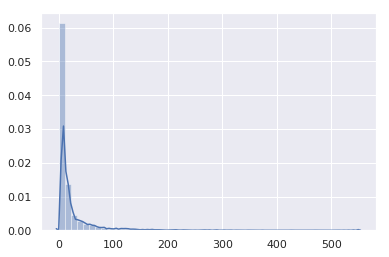

/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NES.pickle
count    15512.000000
mean         6.658587
std          8.167757
min          1.000000
25%          2.000000
50%          4.000000
75%          8.250000
max        264.000000
dtype: float64


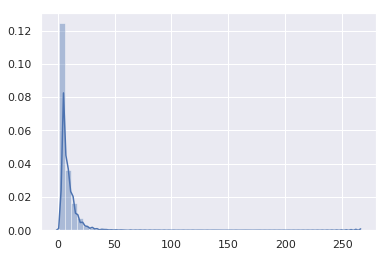

/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NEW.pickle
count    17548.000000
mean        13.362662
std         22.404904
min          1.000000
25%          3.000000
50%          7.000000
75%         14.000000
max        480.000000
dtype: float64


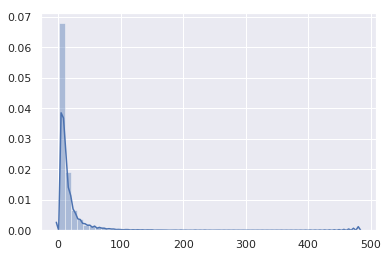

/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NER.pickle
count    8871.000000
mean       14.214970
std        33.503923
min         1.000000
25%         2.000000
50%         5.000000
75%        11.000000
max       536.000000
dtype: float64


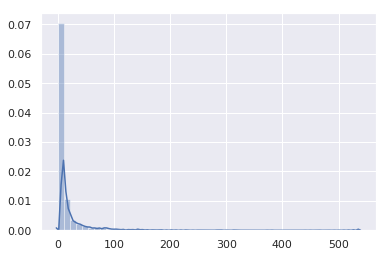

In [44]:
for cate in ['NEL', 'NES', 'NEW', 'NER']:
    dirname = os.getcwd()
    filename = os.path.join(dirname, 'input/Asteria_Eng_ver5_sorted6_{}.pickle'.format(cate))
    print(filename)
    with open(filename, 'rb') as f:
        processed_loaded = pickle.load(f)
    processed_loaded_seqlen = [len(seq) for seq in processed_loaded.values()]
    print(pd.Series(processed_loaded_seqlen).describe())
    sns.distplot(processed_loaded_seqlen)
    plt.show()

/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NEL.pickle
count    7960.000000
mean       12.676633
std        15.152563
min         1.000000
25%         2.000000
50%         6.000000
75%        16.000000
max        50.000000
dtype: float64


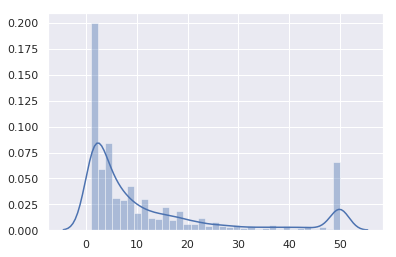

/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NES.pickle
count    15512.000000
mean         6.533845
std          6.939975
min          1.000000
25%          2.000000
50%          4.000000
75%          8.250000
max         50.000000
dtype: float64


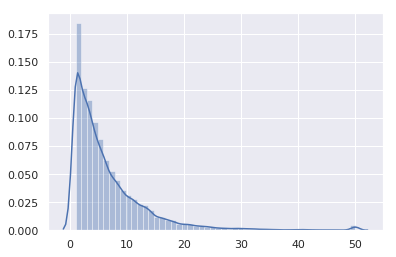

/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NEW.pickle
count    17548.000000
mean        11.474299
std         12.718573
min          1.000000
25%          3.000000
50%          7.000000
75%         14.000000
max         50.000000
dtype: float64


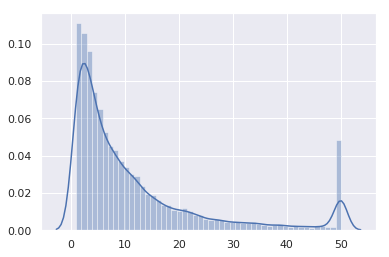

/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NER.pickle
count    8871.000000
mean       10.184647
std        13.401162
min         1.000000
25%         2.000000
50%         5.000000
75%        11.000000
max        50.000000
dtype: float64


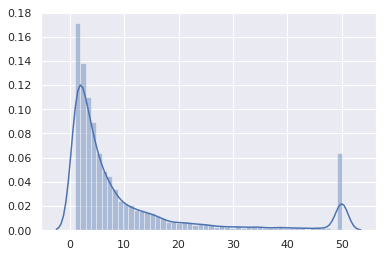

In [45]:
for cate in ['NEL', 'NES', 'NEW', 'NER']:
    dirname = os.getcwd()
    filename = os.path.join(dirname, 'input/Asteria_Eng_ver5_sorted6_{}.pickle'.format(cate))
    print(filename)
    with open(filename, 'rb') as f:
        processed_loaded = pickle.load(f)
    processed_loaded_seqlen = [min(50, len(seq)) for seq in processed_loaded.values()]
    print(pd.Series(processed_loaded_seqlen).describe())
    sns.distplot(processed_loaded_seqlen)
    plt.show()

In [43]:
for cate in ['NEL', 'NES', 'NEW', 'NER']:
    dirname = os.getcwd()
#     filename = os.path.join(dirname, 'input/Asteria_Eng_ver5_sorted_scat_{}.pickle'.format(cate))
    filename = os.path.join(dirname, 'input/Asteria_Eng_ver5_sorted6_{}.pickle'.format(cate))
    print(filename)
    with open(filename, 'rb') as f:
        processed_loaded = pickle.load(f)
    data_useful = set()
    data_dumped = set()
    for seq in processed_loaded.values():
        if len(seq) > 20:
            data_useful |= set([x[0] for x in seq])
        else:
            data_dumped |= set([x[0] for x in seq])
    print(cate)
    print('total data:', len(data_useful | data_dumped))
    print('data useful:', len(data_useful))
    print('data dumped:', len(data_dumped))
    print('data just dumped:', len(data_dumped - data_useful))
    print([sid_list[s] for s in (data_dumped - data_useful)])
    print('=================')

/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NEL.pickle
NEL
total data: 50
data useful: 47
data dumped: 50
data just dumped: 3
['NEL09L01', 'NEL01L05', 'NEL07L04']
/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NES.pickle
NES
total data: 66
data useful: 65
data dumped: 66
data just dumped: 1
['NEL07L04']
/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NEW.pickle
NEW
total data: 163
data useful: 160
data dumped: 163
data just dumped: 3
['NES06L06', 'NES06M01', 'NES06M03']
/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NER.pickle
NER
total data: 47
data useful: 44
data dumped: 47
data just dumped: 3
['NEL08L04', 'NEL08L05', 'NEL08L01']


In [50]:
for cate in ['NEL', 'NES', 'NEW', 'NER']:
    dirname = os.getcwd()
#     filename = os.path.join(dirname, 'input/Asteria_Eng_ver5_sorted_scat_{}.pickle'.format(cate))
    filename = os.path.join(dirname, 'input/Asteria_Eng_ver5_sorted6_{}.pickle'.format(cate))
    print(filename)
    with open(filename, 'rb') as f:
        processed_loaded = pickle.load(f)
    data_useful = set()
    data_dumped = set()
    for seq in processed_loaded.values():
        if len(seq) > 13:
            data_useful |= set([x[0] for x in seq])
        else:
            data_dumped |= set([x[0] for x in seq])
    print(cate)
    print('total data:', len(data_useful | data_dumped))
    print('data useful:', len(data_useful))
    print('data dumped:', len(data_dumped))
    print('data just dumped:', len(data_dumped - data_useful))
    print([sid_list[s] for s in (data_dumped - data_useful)])
    print('=================')

/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NEL.pickle
NEL
total data: 50
data useful: 50
data dumped: 50
data just dumped: 0
[]
/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NES.pickle
NES
total data: 66
data useful: 66
data dumped: 66
data just dumped: 0
[]
/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NEW.pickle
NEW
total data: 163
data useful: 162
data dumped: 163
data just dumped: 1
['NES06L06']
/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NER.pickle
NER
total data: 47
data useful: 47
data dumped: 47
data just dumped: 0
[]


In [51]:
for cate in ['NEL', 'NES', 'NEW', 'NER']:
    dirname = os.getcwd()
#     filename = os.path.join(dirname, 'input/Asteria_Eng_ver5_sorted_scat_{}.pickle'.format(cate))
    filename = os.path.join(dirname, 'input/Asteria_Eng_ver5_sorted6_{}.pickle'.format(cate))
    print(filename)
    with open(filename, 'rb') as f:
        processed_loaded = pickle.load(f)
    data_useful = set()
    data_dumped = set()
    for seq in processed_loaded.values():
        if len(seq) > 9:
            data_useful |= set([x[0] for x in seq])
        else:
            data_dumped |= set([x[0] for x in seq])
    print(cate)
    print('total data:', len(data_useful | data_dumped))
    print('data useful:', len(data_useful))
    print('data dumped:', len(data_dumped))
    print('data just dumped:', len(data_dumped - data_useful))
    print([sid_list[s] for s in (data_dumped - data_useful)])
    print('=================')

/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NEL.pickle
NEL
total data: 50
data useful: 50
data dumped: 50
data just dumped: 0
[]
/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NES.pickle
NES
total data: 66
data useful: 66
data dumped: 66
data just dumped: 0
[]
/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NEW.pickle
NEW
total data: 163
data useful: 163
data dumped: 163
data just dumped: 0
[]
/home/adaptive-model-api/qqhann/ECML2019/dkt_neo/data/input/Asteria_Eng_ver5_sorted6_NER.pickle
NER
total data: 47
data useful: 47
data dumped: 47
data just dumped: 0
[]
